In [3]:
include("../coevolution_network_base.jl")
using .CoevolutionNetworkBase
using Plots
theme(:dracula)

In [40]:
# Parameters
L = 200.0
dx = 0.05
x = -L/2:dx:L/2-dx
r = 3.5
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
# D = 0.0025
D = 0.02
Nh = 4 * 10^6
stochastic = true
sigma = 2.0 

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

# initial_variance = 0.3
# viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))
immune_density .= exp.(-(x .+ 24.2).^2/0.1^2) ./ sqrt(2 * pi * 0.1^2)

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=stochastic, sigma=sigma)
populations = [population]

# populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = 1e-5 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 300.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation);



1
 19.313061 seconds (12.00 k allocations: 183.426 MiB, 0.09% gc time)


6001-element Vector{Float64}:
   0.0
   0.05
   0.1
   0.15
   0.2
   0.25
   0.3
   0.35
   0.4
   0.45
   ⋮
 299.6
 299.65
 299.7
 299.75
 299.8
 299.85
 299.9
 299.95
 300.0

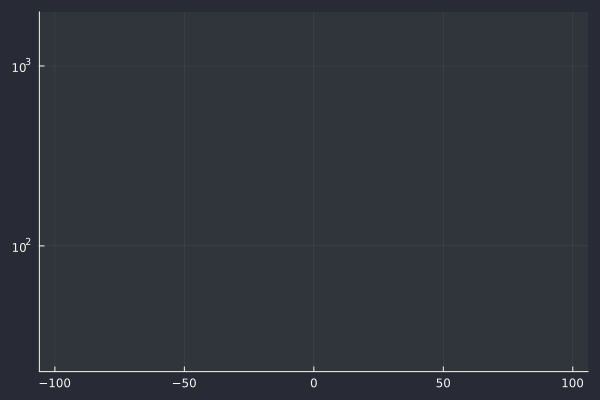

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Inval

In [41]:
p = plot()
for time_index in 1:900:length(simulation.duration_times)
    plot!(p, x, simulation.trajectory[time_index].populations[1].viral_density, lw=2, label=:none, yscale=:log10, ylim=(1/dx, Inf))
end
display(p)

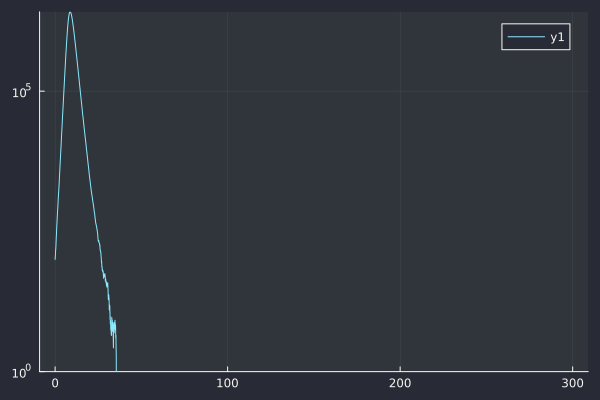

┌ Warning: Invalid negative or zero value 0.0 found at series index 737 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 737 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 737 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106


In [45]:
plot(simulation.duration_times, transpose(calculate_total_infected_per_deme(simulation)), yscale=:log10, ylim=(1,Inf))